# Data Science & Business Analytics Task 1 
### Prediction using Supervised ML
### By Soham More

# To predict the percentage of a student based on the No. of study hour.

**Importing important libraries**

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression


**Loading the data**


In [2]:
data = pd.read_csv("D:/ml/student_scores.csv")
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Data Visualization**

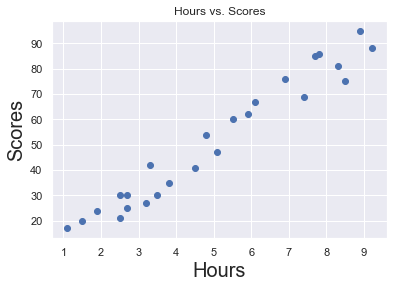

In [4]:
plt.title("Hours vs. Scores")
plt.scatter(data["Hours"],data["Scores"])
plt.xlabel("Hours", fontsize =20)
plt.ylabel("Scores", fontsize = 20)
plt.show()

In [5]:
# There's a positive linear relation between hours studied and marks scored by the students. 

**Regression Model**

In [6]:
# Define the dependent and independent variables
x = data["Hours"]
y = data["Scores"]

In [7]:
# Converting x into a matrix
x = x.values.reshape(-1,1)

In [8]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [9]:
# To train the algorithm we make use of simple linear regression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

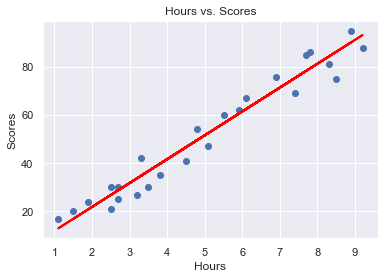

In [10]:
# Plotting the regression line
line = reg.intercept_ + reg.coef_*x
plt.scatter(x,y)
plt.plot(x,line,lw = 2,c = "red")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs. Scores")
plt.show()

In [11]:
# Making predictions using the test data
print(x_test)
y_pred = reg.predict(x_test)


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
# To compare Actual vs Predicted values
df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred})
df.reset_index(inplace = True)
df

,index,Actual Values,Predicted Values
0,5,20,16.884145
1,2,27,33.732261
2,19,69,75.357018
3,16,30,26.794801
4,11,62,60.491033


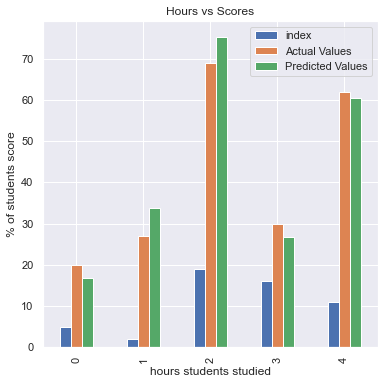

In [13]:
#visualizing the difference
df.plot(kind='bar',figsize=(6,6))
plt.title('Hours vs Scores')
plt.xlabel('hours students studied')
plt.ylabel('% of students score')
plt.show()

In [14]:
# To predict the score of a student who studies 9.25 hr/day
hours = np.array(9.25)
hours = hours.reshape(-1,1)
prediction = reg.predict(hours)
print("No. of hours studies ="+ str(hours[0]))
print("Percentage of scores predicted = "+str(prediction[0]))

No. of hours studies =[9.25]
Percentage of scores predicted = 93.69173248737539


### Evaluating the performance of the model

In [15]:
reg.score(x,y)

0.9526947647057273

In [16]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982


In [17]:
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 21.598769307217456
